In [1]:
import pandas as pd
import numpy as np
import seaborn as sns
import matplotlib.pyplot as plt
from sklearn.preprocessing import StandardScaler


In [2]:
titanic_data = pd.read_csv('titanic.csv')


In [3]:
titanic_data.info()


<class 'pandas.core.frame.DataFrame'>
RangeIndex: 891 entries, 0 to 890
Data columns (total 12 columns):
 #   Column       Non-Null Count  Dtype  
---  ------       --------------  -----  
 0   PassengerId  891 non-null    int64  
 1   Survived     891 non-null    int64  
 2   Pclass       891 non-null    int64  
 3   Name         891 non-null    object 
 4   Sex          891 non-null    object 
 5   Age          714 non-null    float64
 6   SibSp        891 non-null    int64  
 7   Parch        891 non-null    int64  
 8   Ticket       891 non-null    object 
 9   Fare         891 non-null    float64
 10  Cabin        204 non-null    object 
 11  Embarked     889 non-null    object 
dtypes: float64(2), int64(5), object(5)
memory usage: 83.7+ KB


In [4]:
titanic_data.describe()


,PassengerId,Survived,Pclass,Age,SibSp,Parch,Fare
count,891.000000,891.000000,891.000000,714.000000,891.000000,891.000000,891.000000
mean,446.000000,0.383838,2.308642,29.699118,0.523008,0.381594,32.204208
std,257.353842,0.486592,0.836071,14.526497,1.102743,0.806057,49.693429
min,1.000000,0.000000,1.000000,0.420000,0.000000,0.000000,0.000000
25%,223.500000,0.000000,2.000000,20.125000,0.000000,0.000000,7.910400
50%,446.000000,0.000000,3.000000,28.000000,0.000000,0.000000,14.454200
75%,668.500000,1.000000,3.000000,38.000000,1.000000,0.000000,31.000000
max,891.000000,1.000000,3.000000,80.000000,8.000000,6.000000,512.329200


In [5]:
# display first 5 rows of data.
titanic_data.head()


,PassengerId,Survived,Pclass,Name,Sex,Age,SibSp,Parch,Ticket,Fare,Cabin,Embarked
0,1,0,3,"Braund, Mr. Owen Harris",male,22.0,1,0,A/5 21171,7.2500,NaN,S
1,2,1,1,"Cumings, Mrs. John Bradley (Florence Briggs Th...",female,38.0,1,0,PC 17599,71.2833,C85,C
2,3,1,3,"Heikkinen, Miss. Laina",female,26.0,0,0,STON/O2. 3101282,7.9250,NaN,S
3,4,1,1,"Futrelle, Mrs. Jacques Heath (Lily May Peel)",female,35.0,1,0,113803,53.1000,C123,S
4,5,0,3,"Allen, Mr. William Henry",male,35.0,0,0,373450,8.0500,NaN,S


In [6]:
# update the dataframe with the median of Age values on the place of messing values
titanic_data['Age'] = titanic_data['Age'].fillna(titanic_data['Age'].median())


In [7]:
# drop the cabin column
titanic_data = titanic_data.drop(columns = ['Cabin'])

In [8]:
# fill the missing values in the Embarked column with Mode value of the Embarked column using the Mode function
titanic_data['Embarked'] = titanic_data['Embarked'].fillna(titanic_data['Embarked'].mode()[0])


In [9]:
# convert categorical variables into a dummy(indicator) variables
titanic_data = pd.get_dummies(titanic_data, columns = ['Sex', 'Embarked'], drop_first = True)


In [10]:
titanic_data

,PassengerId,Survived,Pclass,Name,Age,SibSp,Parch,Ticket,Fare,Sex_male,Embarked_Q,Embarked_S
0,1,0,3,"Braund, Mr. Owen Harris",22.0,1,0,A/5 21171,7.2500,True,False,True
1,2,1,1,"Cumings, Mrs. John Bradley (Florence Briggs Th...",38.0,1,0,PC 17599,71.2833,False,False,False
2,3,1,3,"Heikkinen, Miss. Laina",26.0,0,0,STON/O2. 3101282,7.9250,False,False,True
3,4,1,1,"Futrelle, Mrs. Jacques Heath (Lily May Peel)",35.0,1,0,113803,53.1000,False,False,True
4,5,0,3,"Allen, Mr. William Henry",35.0,0,0,373450,8.0500,True,False,True
...,...,...,...,...,...,...,...,...,...,...,...,...
886,887,0,2,"Montvila, Rev. Juozas",27.0,0,0,211536,13.0000,True,False,True
887,888,1,1,"Graham, Miss. Margaret Edith",19.0,0,0,112053,30.0000,False,False,True
888,889,0,3,"Johnston, Miss. Catherine Helen ""Carrie""",28.0,1,2,W./C. 6607,23.4500,False,False,True
889,890,1,1,"Behr, Mr. Karl Howell",26.0,0,0,111369,30.0000,True,False,False


In [11]:
# explicitly convert dummy colums into an integer data type
dummy_columns = ['Sex_male', 'Embarked_Q', 'Embarked_S']
titanic_data[dummy_columns] = titanic_data[dummy_columns].astype(int)


In [12]:
titanic_data.head()


,PassengerId,Survived,Pclass,Name,Age,SibSp,Parch,Ticket,Fare,Sex_male,Embarked_Q,Embarked_S
0,1,0,3,"Braund, Mr. Owen Harris",22.0,1,0,A/5 21171,7.2500,1,0,1
1,2,1,1,"Cumings, Mrs. John Bradley (Florence Briggs Th...",38.0,1,0,PC 17599,71.2833,0,0,0
2,3,1,3,"Heikkinen, Miss. Laina",26.0,0,0,STON/O2. 3101282,7.9250,0,0,1
3,4,1,1,"Futrelle, Mrs. Jacques Heath (Lily May Peel)",35.0,1,0,113803,53.1000,0,0,1
4,5,0,3,"Allen, Mr. William Henry",35.0,0,0,373450,8.0500,1,0,1


In [13]:
# creating new feature FamilySize that contains the total number of family members
titanic_data['FamilySize'] = titanic_data['SibSp'] + titanic_data['Parch'] + 1


In [14]:
titanic_data.head()

,PassengerId,Survived,Pclass,Name,Age,SibSp,Parch,Ticket,Fare,Sex_male,Embarked_Q,Embarked_S,FamilySize
0,1,0,3,"Braund, Mr. Owen Harris",22.0,1,0,A/5 21171,7.2500,1,0,1,2
1,2,1,1,"Cumings, Mrs. John Bradley (Florence Briggs Th...",38.0,1,0,PC 17599,71.2833,0,0,0,2
2,3,1,3,"Heikkinen, Miss. Laina",26.0,0,0,STON/O2. 3101282,7.9250,0,0,1,1
3,4,1,1,"Futrelle, Mrs. Jacques Heath (Lily May Peel)",35.0,1,0,113803,53.1000,0,0,1,2
4,5,0,3,"Allen, Mr. William Henry",35.0,0,0,373450,8.0500,1,0,1,1


In [15]:
# creating feature IsAlone that indicates if passenger is traveling alone(1) or with a family members(0)
titanic_data['IsAlone'] = (titanic_data['FamilySize'] == 1).astype(int)


In [16]:
titanic_data.head()

,PassengerId,Survived,Pclass,Name,Age,SibSp,Parch,Ticket,Fare,Sex_male,Embarked_Q,Embarked_S,FamilySize,IsAlone
0,1,0,3,"Braund, Mr. Owen Harris",22.0,1,0,A/5 21171,7.2500,1,0,1,2,0
1,2,1,1,"Cumings, Mrs. John Bradley (Florence Briggs Th...",38.0,1,0,PC 17599,71.2833,0,0,0,2,0
2,3,1,3,"Heikkinen, Miss. Laina",26.0,0,0,STON/O2. 3101282,7.9250,0,0,1,1,1
3,4,1,1,"Futrelle, Mrs. Jacques Heath (Lily May Peel)",35.0,1,0,113803,53.1000,0,0,1,2,0
4,5,0,3,"Allen, Mr. William Henry",35.0,0,0,373450,8.0500,1,0,1,1,1


In [17]:
# drop unnesessary columns
titanic_data = titanic_data.drop(columns=['Name','Ticket','PassengerId'])

In [18]:
titanic_data.head()

,Survived,Pclass,Age,SibSp,Parch,Fare,Sex_male,Embarked_Q,Embarked_S,FamilySize,IsAlone
0,0,3,22.0,1,0,7.2500,1,0,1,2,0
1,1,1,38.0,1,0,71.2833,0,0,0,2,0
2,1,3,26.0,0,0,7.9250,0,0,1,1,1
3,1,1,35.0,1,0,53.1000,0,0,1,2,0
4,0,3,35.0,0,0,8.0500,1,0,1,1,1


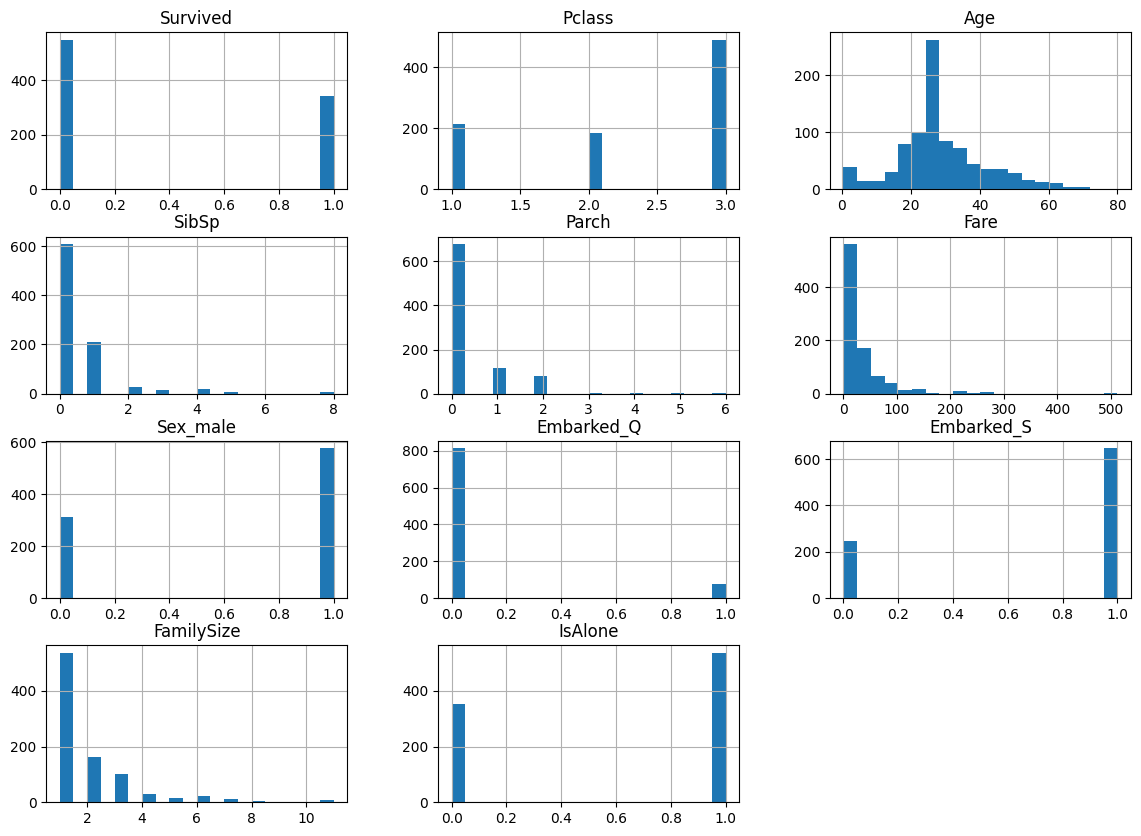

In [19]:
# visualise numerical features
# generating histogram 
titanic_data.hist(bins=20, figsize=(14,10))
plt.show()

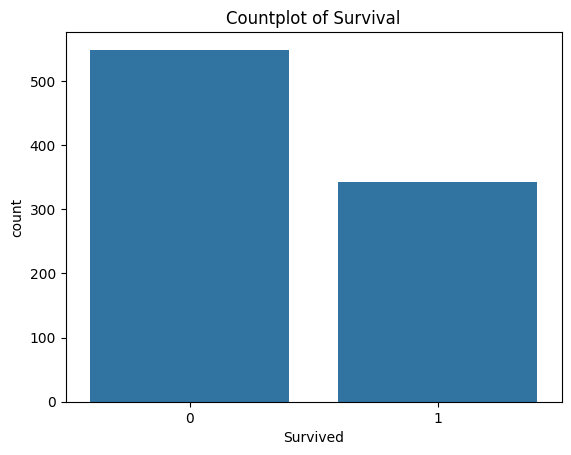

In [20]:
# display countplot of passengers who survived
sns.countplot(x='Survived', data=titanic_data)
plt.title("Countplot of Survival")
plt.show()

In [21]:
# Importing mogules: 
# to split dataset into training and test parts
from sklearn.model_selection import train_test_split
# logistic regression module
from sklearn.linear_model import LogisticRegression
# scaler to standardize features by removing the mean and scaling to unit variance
from sklearn.preprocessing import StandardScaler

X = titanic_data.drop(columns=['Survived'])
y = titanic_data['Survived']


In [22]:
titanic_data.head()

,Survived,Pclass,Age,SibSp,Parch,Fare,Sex_male,Embarked_Q,Embarked_S,FamilySize,IsAlone
0,0,3,22.0,1,0,7.2500,1,0,1,2,0
1,1,1,38.0,1,0,71.2833,0,0,0,2,0
2,1,3,26.0,0,0,7.9250,0,0,1,1,1
3,1,1,35.0,1,0,53.1000,0,0,1,2,0
4,0,3,35.0,0,0,8.0500,1,0,1,1,1


In [23]:
# split the data set into a ttrainng and data subsets
# X - feature matrix, y - target vector
X_train, X_test, y_train, y_test = train_test_split(X,y,test_size=0.2, random_state=42)


In [24]:
# standardize the features in training and testing sets
scaler = StandardScaler()
X_train = scaler.fit_transform(X_train)
X_test = scaler.transform(X_test)


In [25]:
# initialize LR model with max iterations of 1000
log_reg = LogisticRegression(max_iter=1000)
# train LR model, use .fit to find the optimal param. that best predicts the target var
log_reg.fit(X_train, y_train)


LogisticRegression(max_iter=1000)

In [26]:
# use trained LR model to make predictions on the test data
y_pred = log_reg.predict(X_test)


In [27]:
# view the result
y_pred

array([0, 0, 0, 1, 1, 1, 1, 0, 1, 1, 0, 0, 0, 0, 0, 1, 0, 1, 0, 0, 0, 0,
       1, 0, 0, 0, 0, 0, 0, 1, 0, 1, 1, 1, 0, 0, 0, 1, 1, 0, 0, 0, 0, 0,
       1, 0, 0, 0, 0, 0, 1, 1, 0, 1, 0, 1, 0, 1, 1, 1, 0, 1, 1, 0, 0, 1,
       0, 0, 0, 1, 1, 1, 1, 1, 0, 0, 1, 1, 1, 1, 0, 1, 1, 0, 0, 0, 1, 1,
       0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 1, 0, 0, 0, 1, 0, 0, 0, 1, 0, 0, 0,
       1, 0, 1, 0, 1, 0, 0, 0, 1, 0, 0, 1, 1, 0, 0, 0, 1, 1, 1, 0, 1, 0,
       0, 1, 0, 1, 1, 0, 0, 1, 0, 1, 0, 0, 0, 1, 0, 0, 1, 0, 0, 0, 0, 1,
       0, 0, 0, 1, 1, 1, 0, 0, 0, 1, 0, 0, 0, 1, 0, 0, 1, 1, 0, 1, 0, 0,
       0, 1, 1])

In [28]:
from sklearn.metrics import accuracy_score, confusion_matrix, classification_report
# calculate the accuracy of the model
accuracy = accuracy_score(y_test, y_pred)
# generate the confusion matrix
conf_matrix = confusion_matrix(y_test, y_pred)
# generate classification report
class_report = classification_report(y_test, y_pred)
print("Accuracy:", accuracy)
print("Confusion Matrix:\n", conf_matrix)
print("Classification Report:\n", class_report)


Accuracy: 0.7988826815642458
Confusion Matrix:
 [[89 16]
 [20 54]]
Classification Report:
               precision    recall  f1-score   support

           0       0.82      0.85      0.83       105
           1       0.77      0.73      0.75        74

    accuracy                           0.80       179
   macro avg       0.79      0.79      0.79       179
weighted avg       0.80      0.80      0.80       179



In [29]:
import joblib


In [30]:
# saving the model
model = log_reg
joblib.dump(model, 'titanic_model.pkl')
joblib.dump(scaler, 'scaler.pkl')


['scaler.pkl']